## 워드 임베딩

### Bag of Words

단어의 순서를 고려하지 않고, 단어의  등장 빈도 (frequency) 만을 고려해서 단어를 벡터화 하는 방법

https://youtu.be/dKYFfUtij_U 참고

단어를 벡터화 한 후 유사도 측정을 할 수 도 있다.

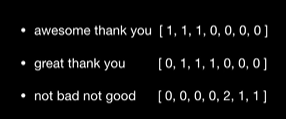

In [1]:
from IPython.display import Image
Image(filename='capture/07_word_vectors.png') 

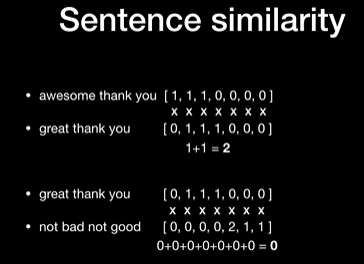

In [2]:
from IPython.display import Image
Image(filename='capture/07_sentence_similarity.png') 

단점이 있다.
- Sparsity: bag of words 로 하면 벡터의 크기가 무지무지 길어지는 것에 반해 0 이 아닌 건 적다.
- Frequent words has more power: 많이 출현하는 단어들에 대해 힘이 커진다.
- Ignoring word orders: 단어의 순서를 무시한다. 이는 문장의 문맥이 무시된다. (ex: home run 과 run home 이 같은 걸로 본다.)
- Out of vocabulary: 보지 못한 단어는 처리하지 못한다.

### DTM (Document-Term Matrix)
- Bag of words 를 사용하여 문서 간 유사도를 비교하기 위한 행렬

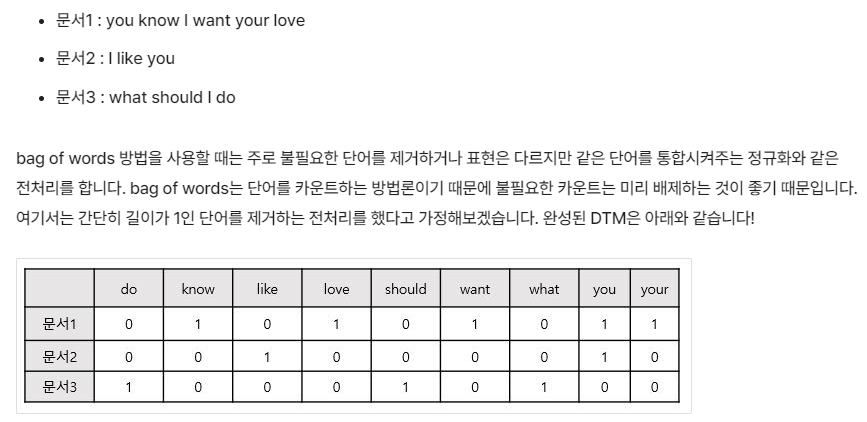

In [3]:
from IPython.display import Image
Image(filename='capture/07_dtm_example.png') 

DTM 의 문서 벡터나 단어 벡터는 대부분의 값이 0 이라는 특징을 가지고 있는데 -> 이를 희소 벡터 (sparse vector) 라고 한다.  
중복 카운트는 배제한 단어들의 집합(set)을 단어장(vocabulary) 라고 한다. -> V 라고 표현하기도 한다.

### TF-IDF
Term Frequency - Inverse Document Frequency

Why TF-IDF?  
단어의 문서 연관성을 찾기 위해

DTM 을 이용해서 문서의 유사도를 비교하는 경우  
단어마다 중요 가중치를 다르게 주는 방법인 TF-IDF 가 등장했다.

https://youtu.be/meEchvkdB1U 참고

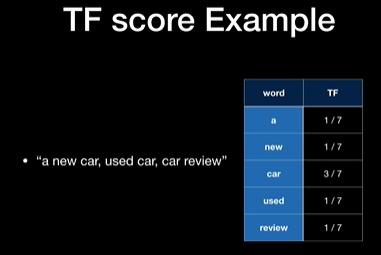

In [5]:
from IPython.display import Image
Image(filename='capture/07_tf_score_example.png') 

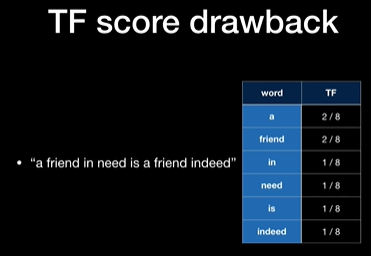

In [6]:
from IPython.display import Image
Image(filename='capture/07_tf_score_drawback.png') 

위 그림에 있는 a 처럼 불용단어도 TF score 가 높게 나오는 경우가 있다.

그래서 나온 개념이 IDF (Inverse Document Frequency) 이다.

Log (Total # of Docs / # of Docs with the term in it) 또는  
Log (Total # of Docs / # of Docs with the term in it + 1) 을 사용해서 구할 수 있다. (+1 은 zero division 을 방지하기 위함이다.)

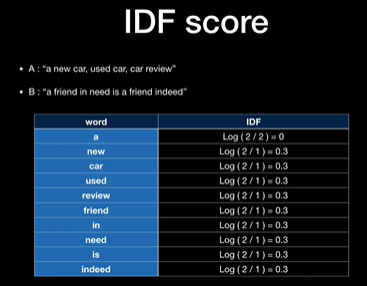

In [7]:
from IPython.display import Image
Image(filename='capture/07_idf_score.png') 

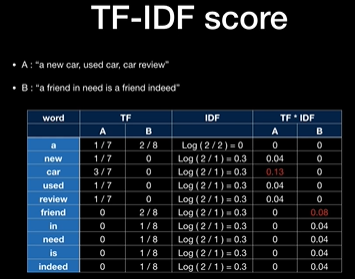

In [8]:
from IPython.display import Image
Image(filename='capture/07_tf-idf_score.png') 

TF-IDF 와 DTM 이 가지는 공통점
- TF-IDF를 사용한다고 하더라도, 여전히 문서 벡터의 크기가 단어장 의 크기인 V이고, 문서 벡터와 단어 벡터 둘 다 여전히 희소 벡터 라는 것

### 원-핫 인코딩 (one-hot encoding)
모든 단어의 관계를 독립적으로 정의하는 원-핫 인코딩이라는 방식

문서 1 : 강아지, 고양이, 강아지  
문서 2 : 애교, 고양이  
문서 3 : 컴퓨터, 노트북

이 코퍼스를 가지고 단어장을 만들면 단어장의 크기는 5 이다.

각 단어에 대해 임의로 고유한 정수를 부여해보겠다.

강아지 : 1번  
고양이 : 2번  
컴퓨터 : 3번  
애교   : 4번  
노트북 : 5번

각 단어를 V차원의 벡터로 표현해보면

강아지 : [1, 0, 0, 0, 0]  
고양이 : [0, 1, 0, 0, 0]  
애교   : [0, 0, 1, 0, 0]  
컴퓨터 : [0, 0, 0, 1, 0]  
노트북 : [0, 0, 0, 0, 1]

위와 같이 원-핫 인코딩을 통해 얻은 벡터를 원-핫 벡터(one-hot vector) 라고 한다.

### 원-핫 인코딩 구현해보기

In [9]:
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


In [10]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

#### 전처리

한글, 공백을 제외한 모든 문자를 표현하는 regex : [^ㄱ-ㅎㅏ-ㅣ가-힣 ]

In [11]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


#### 토큰화

단어장을 구성하기 위해서는 단어장의 원소인 토큰(token)이라는 단위를 정해줄 필요가 있다.  
그리고 한국어는 주로 형태소 분석기를 통해서 토큰 단위를 나눠준다.

여기서는 KoNLPy에 내장된 Okt 형태소 분석기를 사용해보겠다.  
https://konlpy.org/en/latest/api/konlpy.tag/#okt-class 참고

In [12]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


#### 단어장 만들기

여기서는 빈도수가 높은 단어일수록 낮은 정수를 부여하려고 한다.  
빈도수가 높은 순서대로 낮은 정수를 부여하기 위해서 각 단어의 빈도수를 카운트 할 필요가 있는데, 여기서는 파이썬의 Counter 서브클래스를 사용해서 단어의 빈도를 카운트해 보겠다.

In [13]:
vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


most_common()는 상위 빈도수를 가진 단어를 주어진 수만큼 리턴한다. 

이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼 얻을 수 있다. 등장 빈도 수 상위 5개의 단어만 단어장으로 저장해 보겠다.

In [14]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


이제 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여해 보자.

In [15]:
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


이제 각 단어에 고유한 정수를 부여하는 작업이 끝났다! 이제 word2idx를 최종 단어장으로 사용하겠다.

#### 원-핫 벡터 만들기

특정 단어와 단어장을 입력하면 해당 단어의 원-핫 벡터를 리턴하는 함수

In [16]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index-1] = 1
       return one_hot_vector
print("슝=3")

슝=3


In [17]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

### 케라스를 이용한 원-핫 인코딩

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
print("임포트 완료")

임포트 완료


In [19]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

케라스 토크나이저를 사용하면 주어진 텍스트로부터 단어장을 만들고, 단어장의 각 단어에 고유한 정수를 맵핑해 준다.

In [20]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [22]:
vocab_size = len(t.word_index) + 1
vocab_size

6

vocab_size에 1을 더해주는 이유는 케라스 토크나이저는 각 단어에 고유한 정수를 부여할 때, 숫자 1부터 부여하지만  
실제로 자연어 처리를 할 때는 특별 토큰으로 0 번 단어로 단어장에 추가로 사용하는 경우가 많기 때문이다. 

주로 0 번은 패딩(padding) 작업을 위한 패딩 토큰으로 사용되는데,  
여기서는 0 번 단어도 고려해주는 것이 좋다는 정도로만 이해하고 1을 더해서 단어장의 크기를 저장하겠다. 

그래서 vocab_size는 6 이 된 것이다.

In [23]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


In [24]:
one_hot = to_categorical(encoded, num_classes = vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


각 단어가 단어장의 크기인 6차원의 벡터로 변환된 것을 확인할 수 있다.

### 희소 벡터 (sparse vector) 의 문제점

- 차원의 저주 (curse of dimensionality)
  - 저차원에서는 정보의 밀도가 상대적으로 커지지만, 고차원에서는 정보가 흩어지며 밀도가 작아질 것이다.
  - http://thesciencelife.com/archives/1001 참고

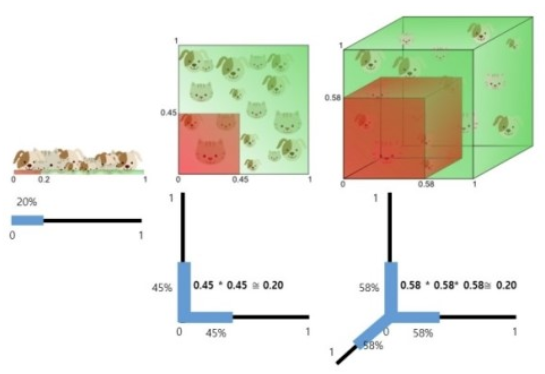

In [25]:
from IPython.display import Image
Image(filename='capture/07_curse_of_dimensionality.png') 

- 원-핫 벡터를 통해서는 단어 벡터 간 유사도를 구할 수 없다.

이에 대한 대안으로 '기계가 단어장 크기보다 적은 차원의 밀집 벡터(dense vector)를 학습'하는 워드 임베딩(word embedding) 이 제안되었다. 

이를 통해 얻는 밀집 벡터는 각 차원이 0과 1이 아닌 다양한 실숫값을 가지며, 이 밀집 벡터를 임베딩 벡터(embedding vector) 라고 한다.

### 워드 임베딩 (word embedding)

워드 임베딩에서도 한 단어를 벡터로 바꾼다. 그런데 그 벡터의 길이를 일정하게 정해준다. 

더 많은 단어가 있다고 해서 벡터의 길이가 길어지지 않는다.  
여기서 일반적으로 벡터의 길이가 단어장 크기보다 매우 작기 때문에 각 벡터 값에 정보가 축약되어야 하고 결국 밀집 벡터(dense vector) 가 된다.

밀집 벡터는 희소 벡터가 가진 특성을 반대로 표현하고 싶어서 만들어진 말이다.  
대부분 값이 0 인 희소 벡터와는 반대로 밀집 벡터에서는 대부분 값이 0 이 아니다.  
또 희소 벡터에서는 각 벡터 값의 의미가 True/False나 갯수처럼 단순했다면 밀집 벡터에서는 각 벡터 값의 의미가 파악하기 어려울 정도로 많은 의미를 함축하고 있다.

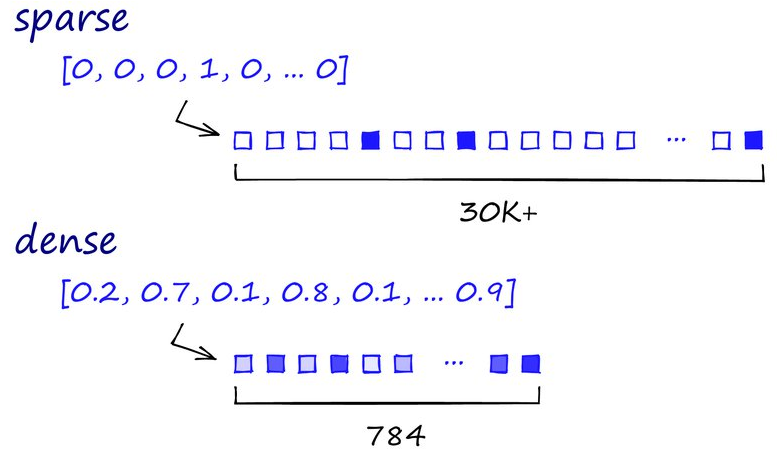

In [26]:
from IPython.display import Image
Image(filename='capture/07_sparse_vector_dense_vector.png') 

예를 들면 아래처럼 단어 벡터가 결정이 되는 것이다.

//      [둥근,빨간,단맛,신맛]  
사과  : [0.8, 0.7, 0.7, 0.1] // 0.8만큼 둥글고, 0.7만큼 빨갛고, 0.7만큼 달고, 0.1만큼 신 것은 사과다  
바나나: [0.1, 0.0, 0.8. 0.0] // 0.1만큼 둥글고, 0.0만큼 빨갛고, 0.8만큼 달고, 0.0만큼 신 것은 바나나다  
귤    : [0.7, 0.5, 0.6, 0.5] // 0.7만큼 둥글고, 0.5만큼 빨갛고, 0.6만큼 달고, 0.5만큼 신 것은 귤이다  

결론적으로 워드 임베딩에서 중요한 두 가지
- 한 단어를 길이가 비교적 짧은 밀집 벡터로 나타낸다.
- 그런데 이 밀집 벡터는 단어가 갖는 의미나 단어 간의 관계 등을 어떤 식으로든 내포하고 있다.

이렇게 만들어진 밀집 벡터를 임베딩 벡터라고 한다.

#### 임베딩 벡터를 만드는 방법은  
훈련 데이터로부터 어떤 모델을 학습하는 과정에서 '자동'으로 얻어지는데, 주로 언어 모델(Language Model)을 학습하는 가운데 얻어진다.

워드 임베딩은 2003년 요슈아 벤지오(Yoshua Bengio) 교수가 NPLM(Neural Probabilistic Language Model) 이란 모델을 통해 제안  
하지만 당시 이 모델은 학습 속도가 지나치게 느리다는 단점이 있었고, 

2013년 구글은 NPLM을 개선하여 정밀도와 속도를 향상시킨 Word2Vec 을 제안

Word2Vec 이후로 FastText 나 GloVe 등과 같은 임베딩 방법이 추가로 제안되었다.

### Word2Vec

#### Word2Vec 이 어떤 일을 할 수 있을까?

https://word2vec.kr/search/ 사이트는 한국어 데이터로 Word2Vec을 학습하여, 학습된 Word2Vec 벡터들로 연산한 결과를 제공하는 사이트이다.

해당 사이트에 가서 '한국 - 서울 + 도쿄'라는 수식을 입력하면, '일본/Noun'이라는 결과가 나온다.  
'박찬호 - 야구 + 축구' 라는 수식을 입력하면 '호나우두/Noun' 이 나온다.

Word2Vec 의 메커니즘을 정리한 영상인 https://youtu.be/sY4YyacSsLc 참고

skipgram 에서 window size = 1 은 가까운 이웃은 1개만 보겠다.  
window size = 2 는 왼쪽 오른쪽 둘 다 보겠다.

는 의미다.

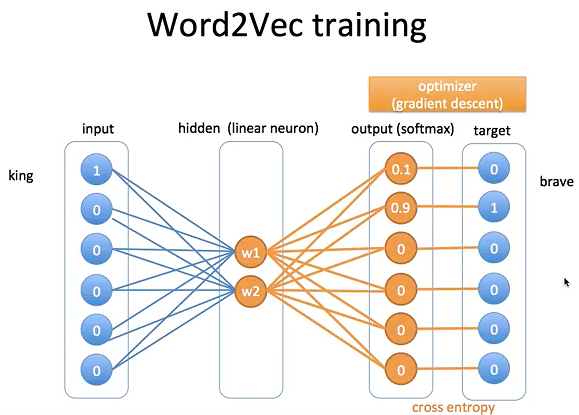

In [28]:
from IPython.display import Image
Image(filename='capture/07_word2vec_training.png') 

one-hot-encoding 된 input 과 output 사이에 있는 hidden 이 embedding vector 가 되는 것이다.

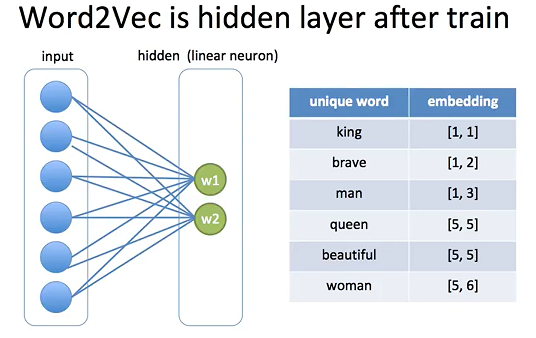

In [29]:
from IPython.display import Image
Image(filename='capture/07_word2vec_is_hidden_layer.png') 

### 분포 가설 (Distributional Hypothesis)

Word2Vec 의 핵심 아이디어는 분포 가설을 따른다.

"You shall know a word by the company it keeps(곁에 오는 단어들을 보면 그 단어를 알 수 있다)."

### Word2Vec - CBoW

Word2Vec 에는 크게 CBoW 와 Skip-gram 라는 두 가지 방법이 있다.

- CBoW는 주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법이다.
- Skip-gram 은 반대로 중간에 있는 단어로 주변 단어들을 예측하는 방법이다.

그 중 CBoW 를 알아보자.

### CBoW (Continuous Bag of Words)

예문 : "I like natural language processing."

CBoW는 중간에 있는 단어를 예측하는 방법이므로 {"i", "like", "language", "processing"}으로부터 "natural"을 예측하는 것은 CBoW가 하는 일이다.  
이때 예측해야 하는 단어 "natural"을 중심 단어(center word) 라고 하고, 예측에 사용되는 단어들을 주변 단어(context word) 라고 한다.

중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지를 결정를 결정했다면, 그 범위를 윈도우(window) 라고 한다.

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window) 라고 한다.

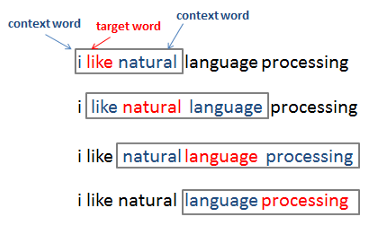

In [30]:
from IPython.display import Image
Image(filename='capture/07_cbow_sliding_window.png') 

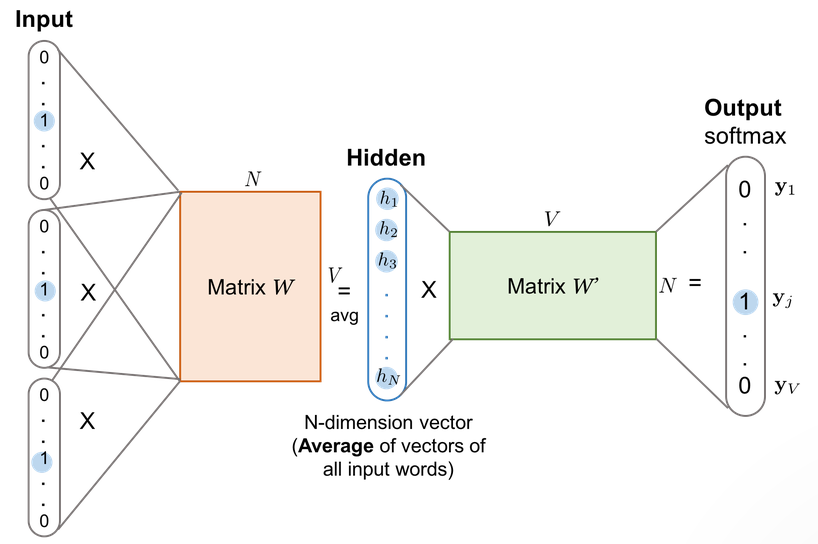

In [31]:
from IPython.display import Image
Image(filename='capture/07_cbow.png') 

사실 Word2Vec은 은닉층이 1개라서 딥 러닝이라기보다는 얕은 신경망(Shallow Neural Network) 을 학습한다고 볼 수 있겠다.

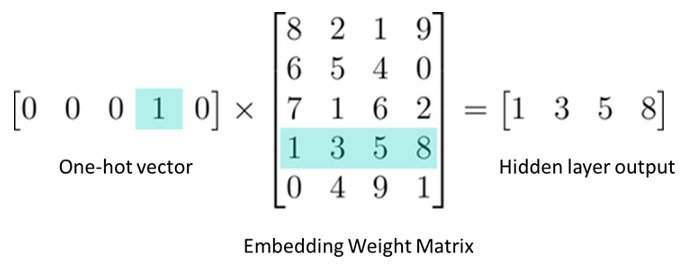

In [32]:
from IPython.display import Image
Image(filename='capture/07_lookup_table.png') 

### Skip-gram

Skip-gram은 데이터셋 구성부터 다릅니다. 중심 단어로부터 주변 단어 각각을 예측하기 때문이다.

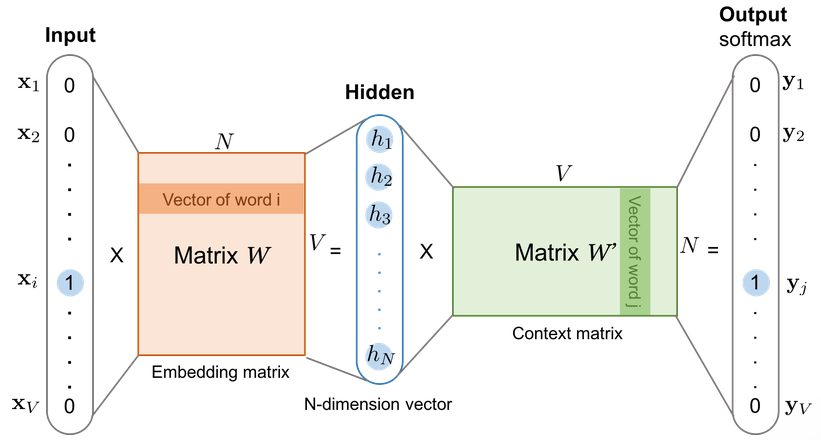

In [33]:
from IPython.display import Image
Image(filename='capture/07_skip_gram.png') 

### 네거티브 샘플링 (Negative Sampling)

대체적으로 Word2Vec를 사용할 때는 SGNS(Skip-Gram with Negative Sampling) 을 사용한다.

하지만 지금 집중하고 있는 중심 단어와 주변 단어가 '사과', '딸기'와 같이 과일과 관련된 단어라면, '필통', '연필'이라는 연관 관계가 없는 단어들의 임베딩 값을 굳이 업데이트할 필요가 없을 것이다.

그래서 네거티브 샘플링은 연산량을 줄이기 위해서 소프트맥스 함수를 사용한 VV개 중 1개를 고르는 다중 클래스 분류 문제 를 시그모이드 함수를 사용한 이진 분류 문제 로 바꾸기로 한다.

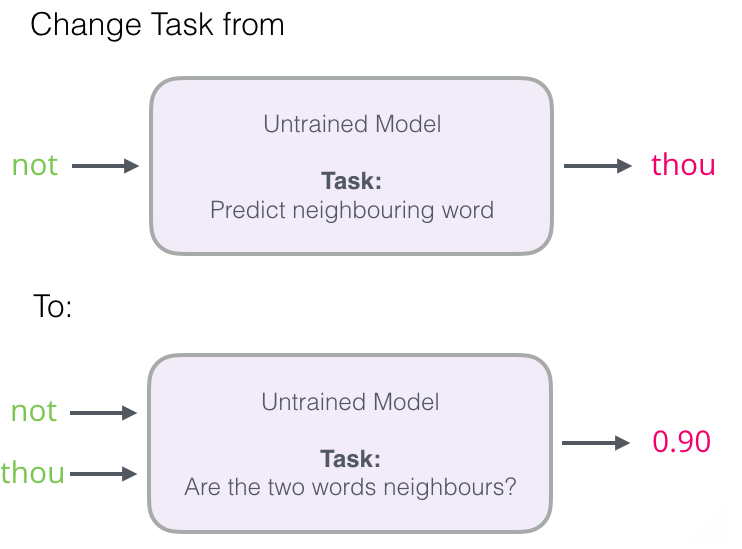

In [34]:
from IPython.display import Image
Image(filename='capture/07_skipgram_with_negative_sampling.png') 

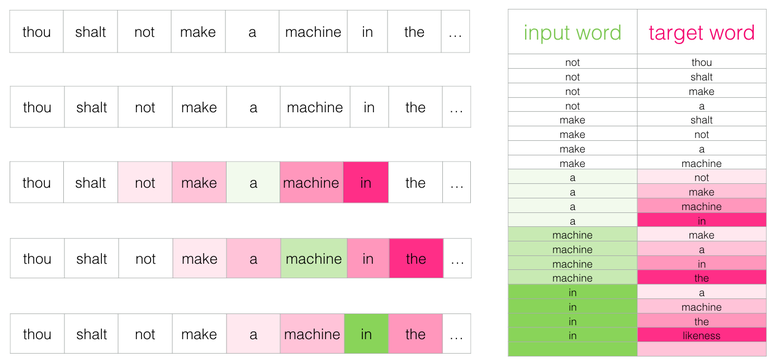

In [35]:
from IPython.display import Image
Image(filename='capture/07_skipgram_dataset.png') 

이렇게 완성된 기존 데이터셋에 1 로 레이블링을 해 주고  
랜덤으로 단어장에 있는 아무 단어나 가져와 target word 로 하는 거짓 데이터셋을 만들고 0 으로 레이블링을 해 주는 것이다.

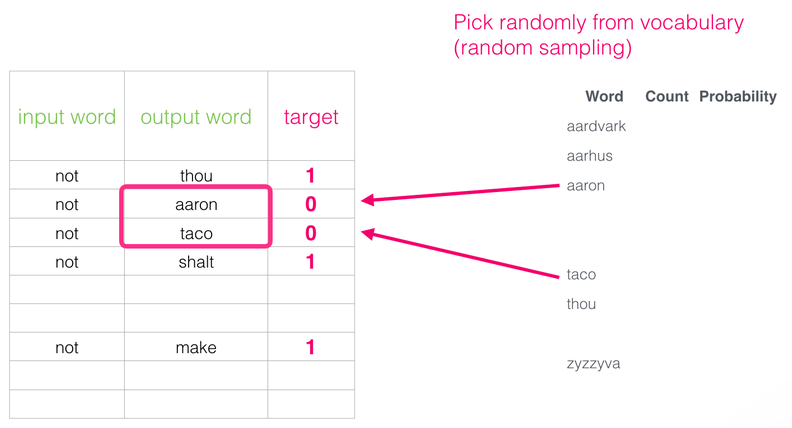

In [36]:
from IPython.display import Image
Image(filename='capture/07_skipgram_make_negative_dataset.png') 

이렇게 완성된 데이터셋으로 학습하면 Word2Vec 은 더 이상 다중 분류 문제가 아니라 이진 분류 문제로 간주할 수 있다.  
중신 단어와 주변 단어를 내적하고, 출력층의 시그모이드 함수를 지나게 하여 1 또는 0 의 레이블로부터 오차를 구해서 역전파를 수행한다.

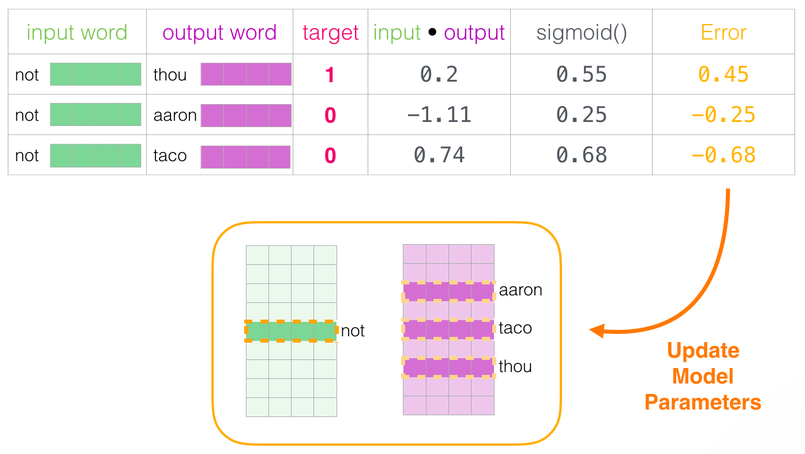

In [39]:
from IPython.display import Image
Image(filename='capture/07_skipgram_training_with_negative_sampling.png') 

이런 학습 방식은 기존의 소프트맥스 함수를 사용했던 방식보다 상당량의 연산량을 줄일 수 있는 효과를 가지고 있다.

이 아이디어는 엄청난 연산량을 필요로 했던 Word2Vec의 학습이 가능케 했던 핵심적인 아이디어 중 하나이다.

다양한 분야에 손쉽게 응용할 수 있는 매력적인 아이디어이므로 잘 알아두자.

### 영어 Word2Vec 실습

영어 데이터를 다운로드받아 직접 Word2Vec을 훈련시켜보겠다.  
Word2Vec을 별도로 구현할 필요없이 파이썬의 gensim 패키지를 통해 이미 구현된 Word2Vec 모델을 사용할 수 있다.

여기서 사용할 훈련 데이터는 NLTK 에서 제공하는 코퍼스이며, gensim 패키지는 토픽 모델링을 위한 NLP 패키지이다.

In [40]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to
[nltk_data]     C:\Users\ziipp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\abc.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziipp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
# NLTK 의 코퍼스를 불러와 corpus라는 변수에 저장
from nltk.corpus import abc
corpus = abc.sents()
print("슝~")

슝~


In [45]:
# 코퍼스가 정상적으로 로딩되었는지 3개만 출력해보자.
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [46]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [49]:
# 이 코퍼스를 가지고 Word2Vec을 훈련해보자.
from gensim.models import Word2Vec

# vector size = 학습 후 임베딩 벡터의 차원
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBoW, 1은 Skip-gram.
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [50]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233290553092957), ('skull', 0.9110273122787476), ('Bang', 0.9056601524353027), ('asteroid', 0.905209481716156), ('third', 0.9020007848739624), ('baby', 0.8994045853614807), ('dog', 0.8985887765884399), ('bought', 0.8975103497505188), ('rally', 0.8912405967712402), ('disc', 0.8889071345329285)]


In [52]:
# 모델을 저장하고 로드해보자.
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('./word_embedding/w2v') 
loaded_model = KeyedVectors.load_word2vec_format("./word_embedding/w2v")
print("모델  load 완료!")

모델  load 완료!


In [53]:
# 로드한 모델이 이전과 동일한 결과를 출력하는지 테스트
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9233290553092957), ('skull', 0.9110273122787476), ('Bang', 0.9056601524353027), ('asteroid', 0.905209481716156), ('third', 0.9020007848739624), ('baby', 0.8994045853614807), ('dog', 0.8985887765884399), ('bought', 0.8975103497505188), ('rally', 0.8912405967712402), ('disc', 0.8889071345329285)]


### Word2Vec 의 OOV 문제

Word2Vec은 Bag of words 학습 과정에서 언급되었던 문제인 사전에 없는 단어(Out Of Vocabuary) 문제를 그대로 가지고 있다.

In [54]:
# 에러가 나더라도 놀라지 마세요.
loaded_model.most_similar('overacting')

KeyError: "Key 'overacting' not present in vocabulary"

### 임베딩 벡터의 시각화

구글이 공개한 임베딩 벡터의 시각화 오픈소스인 임베딩 프로젝터(embedding projector) 를 사용해서 임베딩 벡터들을 시각화해 보겠다.  
임베딩 프로젝터를 통해서 어떤 임베딩 벡터들이 가까운 거리에 군집이 되어 있고, 특정 임베딩 벡터와 유클리드 거리나 코사인 유사도가 높은지 확인할 수 있다.

#### 필요한 파일 만들기
gensim 의 scripts.word2vec2tensor 이용

In [56]:
!python -m gensim.scripts.word2vec2tensor --input ./word_embedding/w2v --output ./word_embedding/w2v

2022-11-17 15:15:22,456 - word2vec2tensor - INFO - running D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\gensim\scripts\word2vec2tensor.py --input ./word_embedding/w2v --output ./word_embedding/w2v
2022-11-17 15:15:22,457 - keyedvectors - INFO - loading projection weights from ./word_embedding/w2v
2022-11-17 15:15:23,107 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (10363, 100) matrix of type float32 from ./word_embedding/w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-11-17T15:15:23.086873', 'gensim': '4.2.0', 'python': '3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'load_word2vec_format'}
2022-11-17 15:15:23,770 - word2vec2tensor - INFO - 2D tensor file saved to ./word_embedding/w2v_tensor.tsv
2022-11-17 15:15:23,771 - word2vec2tensor - INFO - Tensor metadata file saved to ./word_embedding/w2v_metadata.tsv
2022-11-17 15:15:23,771 - word2vec2tensor - INFO -

In [60]:
!dir word_embedding

 D 드라이브의 볼륨: DATA
 볼륨 일련 번호: 3A3D-9FD4

 d:\Study\NotebookProjects\modoo-nlp\word_embedding 디렉터리

2022-11-17  오후 03:15    <DIR>          .
2022-11-17  오후 03:15    <DIR>          ..
2022-11-17  오후 02:30        12,432,087 w2v
2022-11-17  오후 03:15            81,442 w2v_metadata.tsv
2022-11-17  오후 03:15        12,350,635 w2v_tensor.tsv
               3개 파일          24,864,164 바이트
               2개 디렉터리  114,617,540,608 바이트 남음


#### 임베딩 프로젝터에 tsv 파일 업로드하기

https://projector.tensorflow.org/ 주소에서 tensor.tsv 와 metadata.tsv 파일을 업로드하면 볼 수 있다.

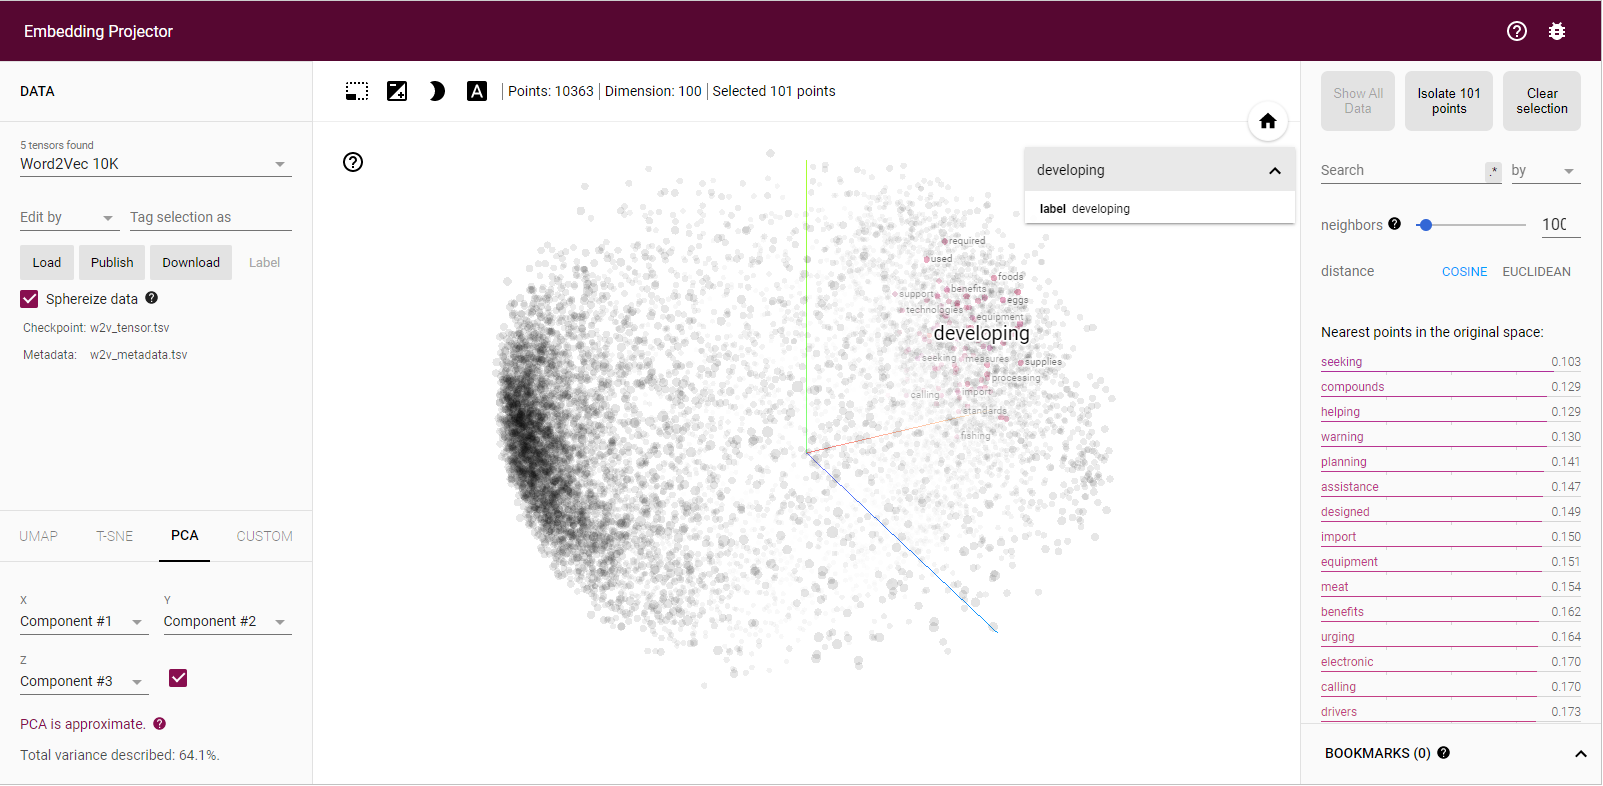

In [61]:
from IPython.display import Image
Image(filename='capture/07_embedding_projector.png') 

### FastText

페이스북에서 개발한 FastText 는 Word2Vec 이후에 등장한 워드 임베딩 방법

메커니즘 자체는 Word2Vec을 그대로 따르고 있지만, 문자 단위 n-gram(character-level n-gram) 표현을 학습한다는 점에서 다르다.  
Word2Vec은 단어를 더 이상 깨질 수 없는 단위로 구분하는 반면, FastText는 단어 내부의 내부 단어(subwords)들을 학습한다는 아이디어를 가지고 있다.

FastText의 n-gram에서 n은 단어들이 얼마나 분리되는지 결정하는 하이퍼파라미터이다. 

n을 3으로 잡은 트라이그램(tri-gram)의 경우, 단어 "partial"은 'par', 'art', 'rti', 'tia', 'ial'로 분리하고 이들을 벡터로 만든다.  
더 정확히는 시작과 끝을 의미하는 <, >를 도입하여 <pa, par, art, rti, tia, ial, al>라는 6개의 내부 단어(subword) 토큰을 벡터로 만든다.  
여기에 추가적으로 하나를 더 벡터화하는데, 기존 단어에 <, 와 >를 붙인 토큰 <partial> 이다.
    
즉 n = 3인 경우, FastText는 단어 partial에 대해 임베딩되는 n-gram 토큰들은 다음과 같다.

예시: # n = 3인 경우  
<pa, par, art, rti, tia, ial, al>, <partial>

예시: # n = 3 ~ 6인 경우  
<pa, par, art, rti, ita, ial, al>, <par, arti, rtia, tial, ial>, <part, ...중략... , <partial>
    
예시: # 각 원소는 벡터임을 가정함  
partial = <pa + par + art + rti + ita + ial + al> + <par + arti + rtia + tial + ial> + <part + ...중략...  + <partial>
    
gensim 패키지에서는 기본값으로 각각 3과 6 으로 n 의 최솟값과 최댓값으로 범위가 설정되어 있다.

#### FastText 의 학습 방법

FastText도 Word2Vec과 마찬가지로 네거티브 샘플링을 사용하여 학습한다.  
다만, Word2Vec과 다른 점은 학습 과정에서 중심 단어에 속한 문자 단위 n-gram 단어 벡터들을 모두 업데이트한다는 점이다.

#### OOV 와 오타에 대한 대응

FastText는 Word2Vec과 달리 OOV와 오타에 강건하다(robust) 는 특징이 있다.  
이는 단어장에 없는 단어라도, 해당 단어의 n-gram이 다른 단어에 존재하면 이로부터 벡터값을 얻는다는 원리에 기인한다.

앞 서 Word2Vec 에서 학습한 corpus 를 학습해보자.

In [62]:
from gensim.models import FastText
fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1)
print("FastText 학습 완료!")

FastText 학습 완료!


In [63]:
fasttext_model.wv.most_similar('overacting')

[('extracting', 0.9475885629653931),
 ('lifting', 0.9322723150253296),
 ('losing', 0.9308752417564392),
 ('climbing', 0.9306472539901733),
 ('fluctuating', 0.9274422526359558),
 ('overwhelming', 0.9273525476455688),
 ('emptying', 0.9258849024772644),
 ('mixing', 0.9249122142791748),
 ('clotting', 0.9227932095527649),
 ('contracting', 0.9224870800971985)]

'overacting'이 단어장에 없던 단어임에도 정상적으로 임베딩 벡터값이 계산되어 유사 단어 10개를 출력하는 것을 볼 수 있다.

#### 한국어에서의 FastText

한국어도 당연히 FastText 방식으로 학습시킬 수 있다.  
영어의 경우 문자, 즉 알파벳 단위가 n-gram이었다면 한국어의 경우에는 음절 단위라고 볼 수 있겠다.

### GloVe

글로브(Global Vectos for Word Respresentation, GloVe) 는 2014년에 미국 스탠포드 대학에서 개발한 워드 임베딩 방법론이다.

워드 임베딩의 두 가지 접근 방법인 카운트 기반과 예측 기반 두 가지 방법을 모두 사용했다 는 것이 특징이다.

카운트 기반 방법이란?

앞서 단어의 빈도를 수치화한 방법이 DTM 이라고 했다.
하지만 DTM 은 단어 간 유사도를 반영할 수 없을 뿐만 아니라, 대부분의 값이 0 인 희소 표현이라는 특징이 있다.

DTM을 차원 축소하여 밀집 표현(dense representation)으로 임베딩 하는 방법이 LSA(Latent Semantic Analysis) 이다.

#### 잠재 의미 분석 (LSA, Latent Semantic Analysis)

https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/ 참고  
https://youtu.be/GVPTGq53H5I 참고

LSA를 요약하면 DTM에 특잇값 분해를 사용하여 잠재된 의미를 이끌어내는 방법론 이다.

그 결과의 행벡터를 사용해서 임베딩 벡터를 얻을 수도 있다.  
LSA는 단어를 카운트해서 만든 DTM을 입력으로 하므로 카운트 기반의 임베딩 방법이라고 볼 수 있는데, 이 방법은 몇 가지 한계가 있었다.
- 차원 축소의 특성으로 인해 새로운 단어가 추가되면 다시 DTM을 만들어 새로 차원 축소를 해야 한다.
- 단어 벡터간 유사도를 계산하는 측면에서 Word2Vec보다 성능이 떨어진다.

LSA와 대조되는 방법으로 예측 기반의 방법 은 Word2Vec과 같은 방법을 말한다.

그리고 카운트 기반과 예측 기반을 모두 사용하여 Word2Vec보다 더 나은 임베딩 방법을 제안하였는데, GloVe가 그 주인공이다.  
하지만 경험적으로 봤을 때, GloVe가 Word2Vec보다 반드시 뛰어나다고 장담하기는 어렵고, Word2Vec에 거의 준하는 성능을 보여준다고 평가되고 있다고 한다.

### 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

GloVe를 이해하기 위해서는 윈도우 기반 동시 등장 행렬 의 정의에 대해서 이해할 필요가 있다. 

다음과 같이 3개의 문장이 있는 코퍼스가 있다고 해보자.
- I like deep learning.
- I like NLP.
- I enjoy flying.

이로부터 만들어진 동시 등장 행렬(Co--occurence Matrix)은 다음과 같다.

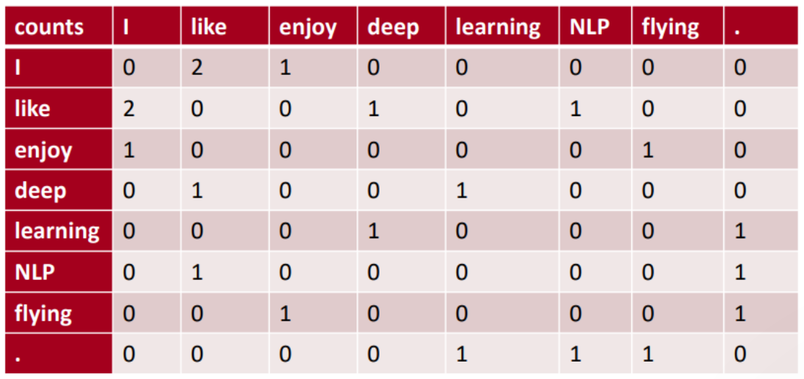

In [64]:
from IPython.display import Image
Image(filename='capture/07_co-occurence_matrix_when_window_1.png') 

윈도우 기반 동시 등장 행렬은 행과 열을 전체 단어장(vocabulary)의 단어들로 구성하고,  
어떤 i 단어의 윈도우 크기(window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬이다.

위의 경우에는 윈도우 크기를 1 로 한 것이다.

이러한 동시 등장 행렬은 전치(transpose)해도 동일한 행렬이 된다는 특징을 가지고 있다.

### 동시 등장 확률 (co-occurence probability)

동시 등장 확률 P (k|i)P(k∣i) 는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률이다.

이 때 i 를 중심 단어(center word), k를 주변 단어(context word) 라고 한다.

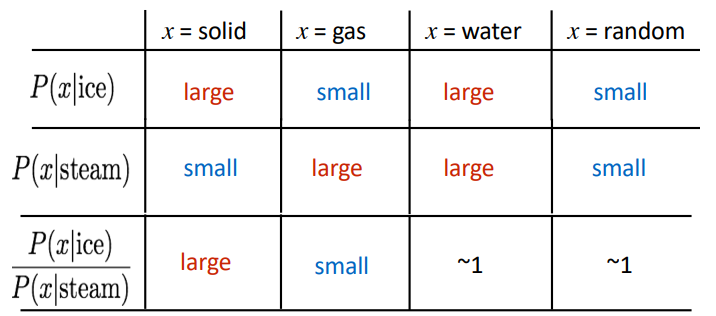

In [65]:
from IPython.display import Image
Image(filename='capture/07_co-occurence_probability.png') 

### GloVe 의 손실 함수 설계하기

GloVe는 동시 등장 행렬로부터 계산된 동시 등장 확률을 이용해 손실 함수를 설계한다.

동시 등장 행렬을 사용하고 있으니 코퍼스의 전체적인 통계 정보를 활용하는 '카운트 기반'의 방법론이면서, 손실 함수를 통해 모델을 학습시키므로 '예측 기반'의 방법론이라고 할 수 있는 것이다.

GloVe의 아이디어를 한 줄 요약하면 다음과 같다.

"중심 단어 벡터와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 빈도의 로그값이 되도록 만드는 것"

말을 조금 바꿔서

"전체 코퍼스에서의 동시 등장 빈도의 로그값과 중심 단어 벡터와 주변 단어 벡터의 내적값의 차이가 최소화되도록 두 벡터의 값을 학습하는 것" 라고 할 수 있겠다.

### pre-trained GloVe 모델 실습

GloVe는 2014년에 개발되었고, 2015년에 1.2 버전이 나온 이후로는 관리되지 않고 있기 때문에 최신 버전의 python에서는 GloVe를 설치하는 것이 불가능하다. 

따라서 pre-trained된 GloVe 모델을 불러와서 간단한 실습을 해보겠다.

GloVe에는 4개의 데이터셋을 사용해 pre-trained된 word vector들이 있다.

- Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download)
- Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download)
- Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 300d vectors, 822 MB download)
- Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 200d vectors, 1.42 GB download)

gensim을 이용해 pre-train된 Glove 모델을 간단히 불러올 수 있다.  
여기서는 'Wikipedia 2014 + Gigaword 5' 데이터셋으로 학습된 모델을 불러오겠다.

In [66]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-50")  # glove vectors 다운로드
glove_model.most_similar("dog")  # 'dog'과 비슷한 단어 찾기

[==================================================] 100.0% 66.0/66.0MB downloaded


[('cat', 0.9218004941940308),
 ('dogs', 0.8513158559799194),
 ('horse', 0.7907583713531494),
 ('puppy', 0.7754920721054077),
 ('pet', 0.7724708318710327),
 ('rabbit', 0.7720814347267151),
 ('pig', 0.7490062117576599),
 ('snake', 0.7399188876152039),
 ('baby', 0.7395570278167725),
 ('bite', 0.7387937307357788)]

In [67]:
glove_model.most_similar('overacting')

[('impudence', 0.7842012047767639),
 ('puerile', 0.7816032767295837),
 ('winningly', 0.7644237875938416),
 ('grossness', 0.7576098442077637),
 ('deconstructions', 0.748936653137207),
 ('over-the-top', 0.7460805773735046),
 ('buffoonery', 0.746045708656311),
 ('impetuosity', 0.7415392398834229),
 ('sophomoric', 0.736961841583252),
 ('zaniness', 0.7353197336196899)]

GloVe는 Word2Vec과 같이 OOV 문제를 가지고 있어서 'memoryy'라는 단어는 인식하지 못한다.  
또한 pre-trained GloVe 모델은 한글이나 알파벳 대문자가 포함된 데이터셋으로 학습하지 않았기 때문에 알파벳 소문자만 인식한다는 사실에 유의해라.